In [1]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

entity = "ocrl_benchmark"
project = "ood-test"

# colormap
cm = plt.cm.get_cmap("tab20").colors
# models
models = {
    "GT": {
        "tags": ["gt"],
        "line_cm": cm[2],
        "range_cm": cm[3],
        "marker": "o",
        "fill_style": "full",
        "line_style": "dotted",
    },
    "Single-Vector Rep. E2E Learning": {
        "tags": ["end-to-end learning", "distributed representation"],
        "line_cm": cm[4],
        "range_cm": cm[5],
        "marker": "v",
        "fill_style": "full",
        "line_style": "dashed",
    },
    "Fixed-Region Rep. E2E Learning": {
        "tags": ["end-to-end learning", "region representation"],
        "line_cm": cm[6],
        "range_cm": cm[7],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "OCR E2E Learning": {
        "tags": ["end-to-end learning", "ocr"],
        "line_cm": cm[8],
        "range_cm": cm[9],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "Single-Vector Rep. Pretraining": {
        "tags": ["pretraining", "distributed representation"],
        "line_cm": cm[10],
        "range_cm": cm[11],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "Fixed-Region Rep. Pretraining": {
        "tags": ["pretraining", "region representation"],
        "line_cm": cm[12],
        "range_cm": cm[13],
        "marker": "v",
        "full_style": "full",
        "line_style": "dashed",
    },
    "OCR Pretraining": {
        "tags": ["pretraining", "ocr"],
        "line_cm": cm[14],
        "range_cm": cm[15],
        "marker": "*",
        "full_style": "full",
        "line_style": "dashed",
    },
    "SLATE": {
        "tags": ["slate"],
        "line_cm": cm[16],
        "range_cm": cm[17],
        "marker": "*",
        "full_style": "full",
        "line_style": "dashed",
        
    }
}
print(f"Models: {models.keys()}")

envs = [
    # unseen number of objects
    [
        ["target-N3C4S3S1", "target-N4C4S3S1", "target-N5C4S3S1", "target-N6C4S3S1"],
        ["push-N1C4S1S1", "push-N2C4S1S1", "push-N3C4S1S1", "push-N4C4S1S1"],
        ["odd-one-out-N3C2S2S1-oc", "odd-one-out-N4C2S2S1-oc", "odd-one-out-N5C2S2S1-oc", "odd-one-out-N6C2S2S1-oc"],
        ["odd-one-out-N3C2S2S1", "odd-one-out-N4C2S2S1", "odd-one-out-N5C2S2S1", "odd-one-out-N6C2S2S1"],
    ],
    # unseen objects
    [
        ["target-N4C4S3S1", "target-N4C4S3S1-ood-ocr-color1", "target-N4C4S3S1-ood-ocr-color2", "target-N4C4S3S1-ood-ocr-color3"],
        ["push-N3C4S1S1", "push-N3C4S1S1-ood-ocr-color1", "push-N3C4S1S1-ood-ocr-color2", "push-N3C4S1S1-ood-ocr-color3"],
        ["odd-one-out-N4C2S2S1-oc", "odd-one-out-N4C2S2S1-oc-ood-ocr-color1", "odd-one-out-N4C2S2S1-oc-ood-ocr-color2"],
        ["odd-one-out-N4C2S2S1", "odd-one-out-N4C2S2S1-ood-ocr-color1", "odd-one-out-N4C2S2S1-ood-ocr-color2"],
    ]
]

env_names = [
    [
        "Unseen #Dists(Obj Goal)",
        "Unseen #Dists(Obj Int.)",
        "Unseen #Objs(Obj Comp.)",
        "Unseen #Objs(Prop Comp.)",
    ],
    [
        "Unseen Colors(Obj Goal)",
        "Unseen Colors(Obj Int.)",
        "Unseen Colors(Obj Comp.)",
        "Unseen Colors(Prop Comp.)",
    ],
]    

results = {}
api = wandb.Api(timeout=19)
for model_name in models.keys():
    model_tags = models[model_name]["tags"]
    for i in range(len(env_names)):
        for j in range(len(env_names[i])):
            env_name = env_names[i][j]
            if not env_name in results.keys():
                results[env_name] = {}
            if not model_name in results[env_name].keys():
                results[env_name][model_name] = {"mean": [], "std": []}
            for env_tag in envs[i][j]:
                filters = [{"tags": tag} for tag in (model_tags+[env_tag])]
                runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
                means, stds = [], []
                for run in runs:
                    print(run)
                    means.append(run.summary_metrics["mean_reward"])
                    stds.append(run.summary_metrics["std_reward"])
                mean = np.mean(means)
                std = np.mean(stds)
                results[env_name][model_name]["mean"].append(mean)
                results[env_name][model_name]["std"].append(std)
                
                    

Models: dict_keys(['GT', 'Single-Vector Rep. E2E Learning', 'Fixed-Region Rep. E2E Learning', 'OCR E2E Learning', 'Single-Vector Rep. Pretraining', 'Fixed-Region Rep. Pretraining', 'OCR Pretraining', 'SLATE'])
<Run ocrl_benchmark/ocrl-ood-res/z6mtl00h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2cas2e8d (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1ncpsm4w (finished)>
<Run ocrl_benchmark/ocrl-ood-res/v7o7jbjs (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2r25dqi0 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1v1u92kx (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3l94tl5m (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2sfzmajd (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1baignkk (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3defjt2t (finished)>
<Run ocrl_benchmark/ocrl-ood-res/28kos24e (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1c24jci7 (finished)>


/Users/i338425/miniconda3/envs/ocrl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/i338425/miniconda3/envs/ocrl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Run ocrl_benchmark/ocrl-ood-res/3dx2924h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/yo7ub5wy (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1opex3ek (finished)>
<Run ocrl_benchmark/ocrl-ood-res/o8rv3l7h (finished)>
<Run ocrl_benchmark/ocrl-ood-res/31j59suw (finished)>
<Run ocrl_benchmark/ocrl-ood-res/2son9hsr (finished)>
<Run ocrl_benchmark/ocrl-ood-res/s3ke1qzb (finished)>
<Run ocrl_benchmark/ocrl-ood-res/o7jynu0k (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3bp6o0io (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3035ky6x (finished)>
<Run ocrl_benchmark/ocrl-ood-res/f1ayr5yg (finished)>
<Run ocrl_benchmark/ocrl-ood-res/729ffgtb (finished)>
<Run ocrl_benchmark/ocrl-ood-res/h213780k (finished)>
<Run ocrl_benchmark/ocrl-ood-res/22kfrq94 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/1x1ngg16 (finished)>
<Run ocrl_benchmark/ocrl-ood-res/oyeklnav (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3th3h07f (finished)>
<Run ocrl_benchmark/ocrl-ood-res/3pgltlki (finished)>
<Run ocrl_benchmark/ocrl-ood

In [2]:
for env_name in results.keys():
    print(env_name)
    for model_name in results[env_name].keys():
        print(model_name, results[env_name][model_name]["mean"])
        
import json
with open("results/regime_wise_ood.json", "w") as f:
    json.dump(results, f)

Unseen #Dists(Obj Goal)
GT [0.9833333333333334, 0.9533333333333333, 0.9666666666666667, 0.8866666666666667]
Single-Vector Rep. E2E Learning [0.9833333333333334, 0.9566666666666667, 0.96, 0.91]
Fixed-Region Rep. E2E Learning [0.98, 0.9533333333333333, 0.9766666666666666, 0.91]
OCR E2E Learning [0.9899999999999999, 0.9499999999999998, 0.96, 0.9233333333333333]
Single-Vector Rep. Pretraining [0.6911111111111111, 0.6722222222222223, 0.6622222222222223, 0.6211111111111112]
Fixed-Region Rep. Pretraining [0.9833333333333334, 0.9499999999999998, 0.93, 0.8566666666666666]
OCR Pretraining [0.9833333333333334, 0.9383333333333334, 0.945, 0.89]
SLATE [0.9899999999999999, 0.9366666666666665, 0.9633333333333333, 0.9066666666666667]
Unseen #Dists(Obj Int.)
GT [nan, nan, 0.8366666666666666, nan]
Single-Vector Rep. E2E Learning [0.8733333333333334, 0.8366666666666666, 0.7133333333333333, 0.6933333333333334]
Fixed-Region Rep. E2E Learning [0.35000000000000003, 0.30333333333333334, 0.32, 0.300000000000000

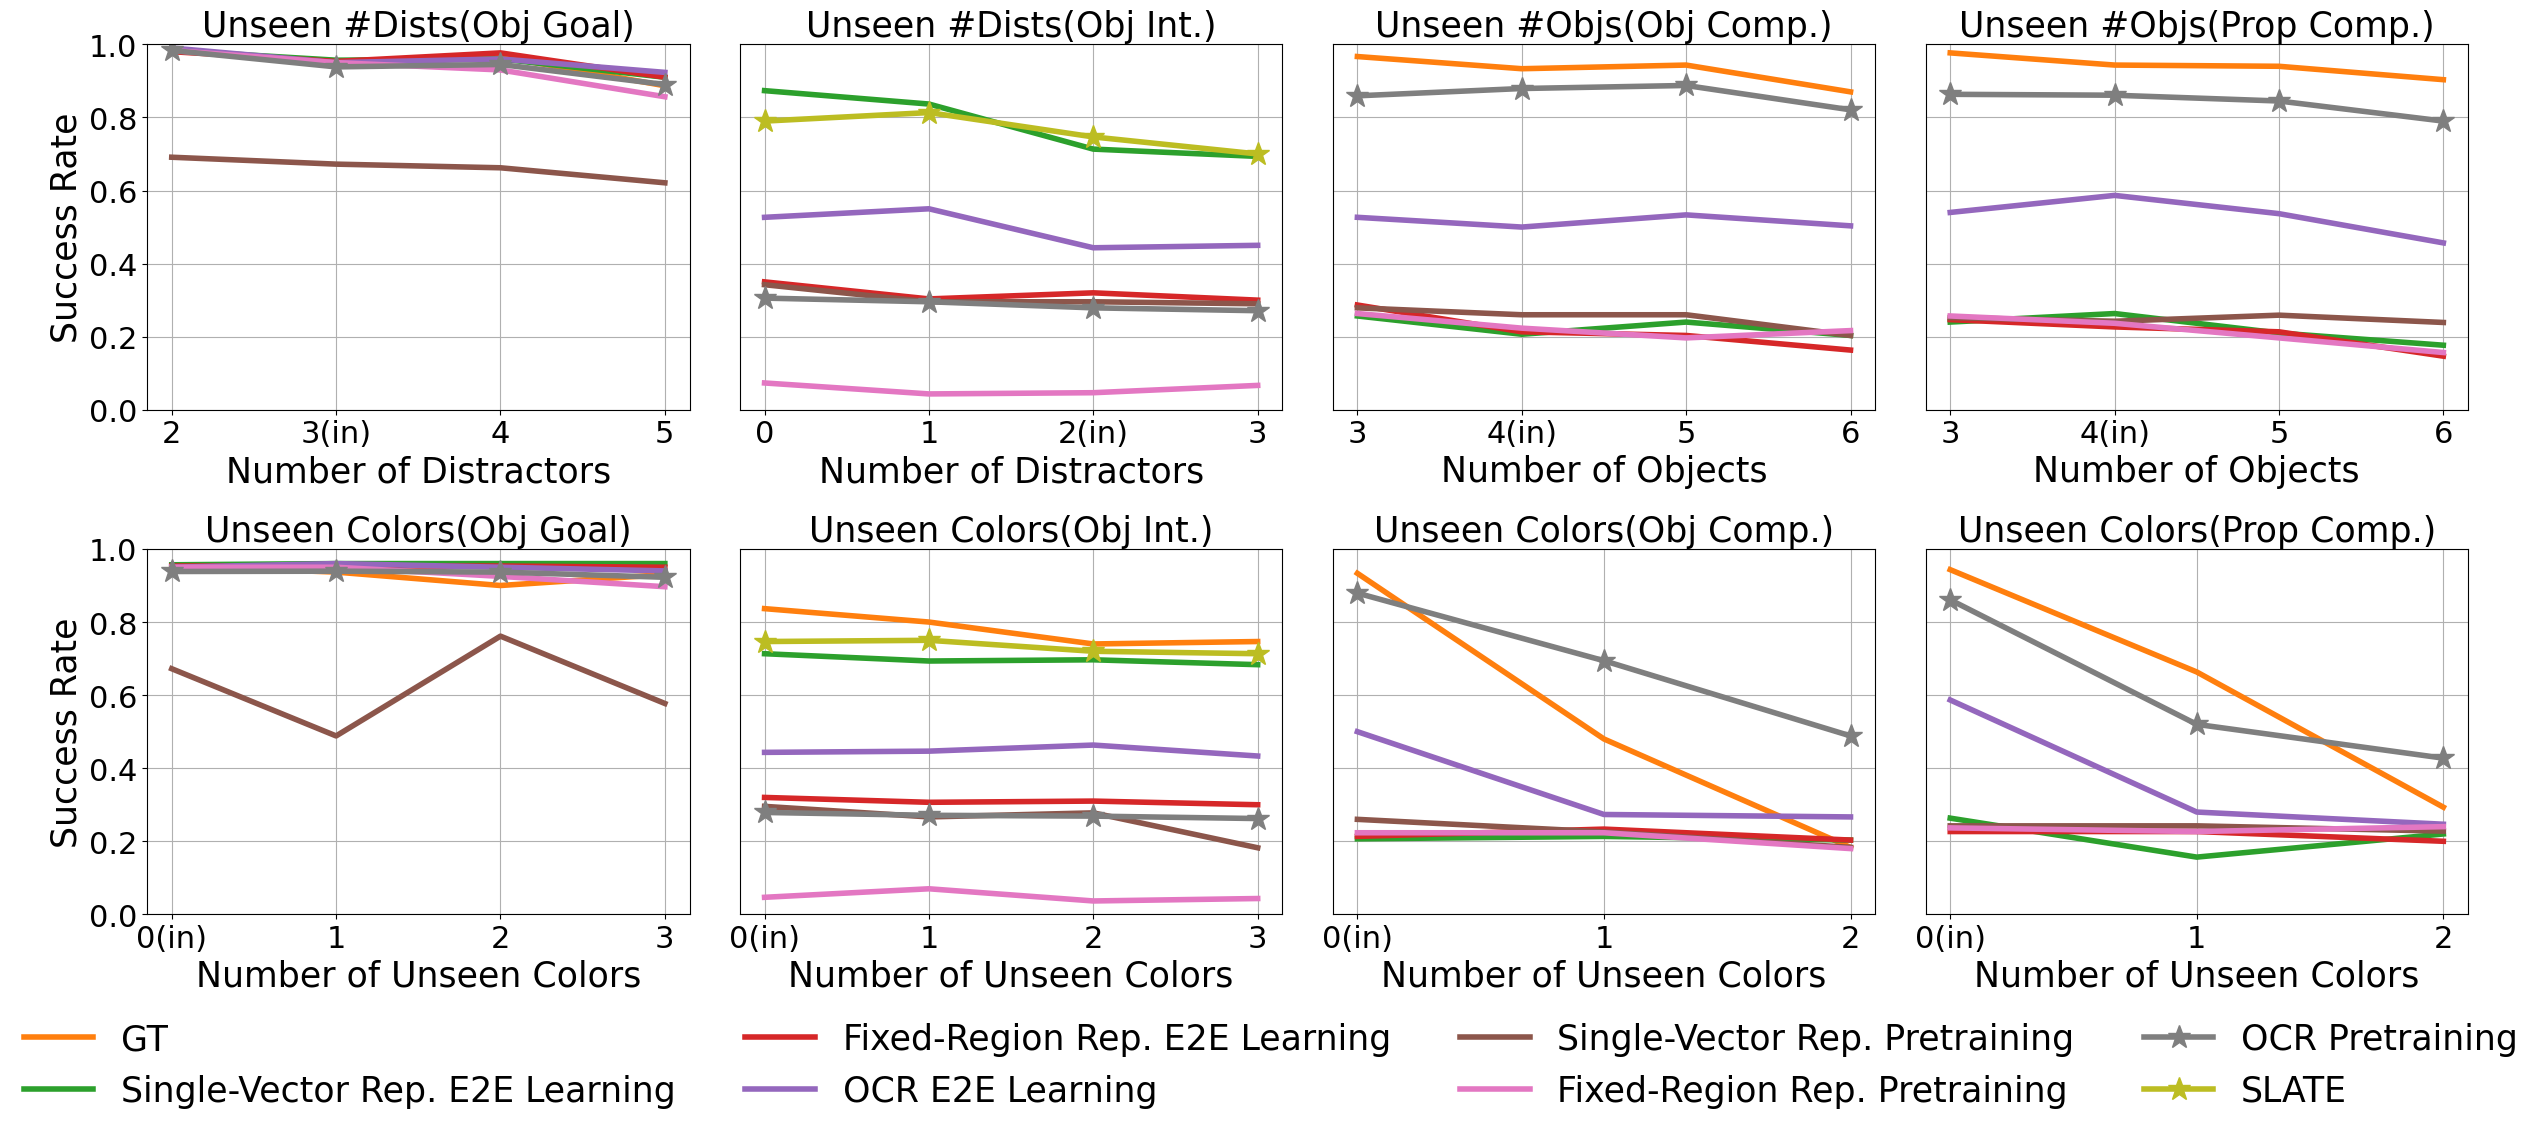

In [5]:
shape = (2,4)
#shape = (1,2)
# plots
top = 0.05
hspace = 0.12
bottom = 0.2 if shape[0] != 1 else 0.35
height = (1 - top - bottom - hspace * (shape[0] - 1)) / shape[0]
left = 0.054
#wspace = 0.048
wspace = 0.02
right = 0.025
width = (1 - left - right - wspace * (shape[1] - 1)) / shape[1]
recs = np.zeros(shape, dtype=object)
for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        recs[i, j] = [
            left + j * (width + wspace),  # left
            bottom + (recs.shape[0] - 1 - i) * (height + hspace),  # bottom
            width,
            height,
        ]
plt.figure(figsize=(6.3 * recs.shape[1], 5.8 * recs.shape[0]))

for i in range(recs.shape[0]):
    for j in range(recs.shape[1]):
        ax = plt.axes(recs[i,j])
        env_name = env_names[i][j]
        _results = results[env_name]
        if env_name == "Unseen #Dists(Obj Goal)":
            _x = ["2", "3(in)", "4", "5"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Dists(Obj Int.)":
            _x = ["0", "1", "2(in)", "3"]
            _x_name = "Number of Distractors"
        elif env_name == "Unseen #Objs(Obj Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen #Objs(Prop Comp.)":
            _x = ["3", "4(in)", "5", "6"]
            _x_name = "Number of Objects"
        elif env_name == "Unseen Colors(Obj Goal)": 
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Int.)":
            _x = ["0(in)", "1", "2", "3"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Obj Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        elif env_name == "Unseen Colors(Prop Comp.)":
            _x = ["0(in)", "1", "2"]
            _x_name = "Number of Unseen Colors"
        for model_name in _results.keys():
            if (model_name=="SLATE") and ((env_name!="Unseen #Dists(Obj Int.)") and (env_name!="Unseen Colors(Obj Int.)")):
                continue
            _y = np.array(_results[model_name]["mean"])
            _color = models[model_name]["line_cm"]
            if model_name == "OCR Pretraining":
                line = ax.errorbar(_x, _y, linewidth=4, color=_color, label=model_name,
                    #linestyle=models[_model]["line_style"],
                    marker=models[model_name]["marker"],
                    markersize=17,
                    #fillstyle=models[_model]["fill_style"],
                )
            elif model_name == "SLATE":
                line = ax.errorbar(_x, _y, linewidth=4, color=_color, label=model_name,
                    #linestyle=models[_model]["line_style"],
                    marker=models[model_name]["marker"],
                    markersize=17,
                    #fillstyle=models[_model]["fill_style"],
                )
            else:
                line = ax.errorbar(_x, _y, linewidth=4, color=_color, label=model_name,
                    #linestyle=models[_model]["line_style"],
                    #marker=models[_model]["marker"],
                    #markersize=13,
                    #fillstyle=models[_model]["fill_style"],
                )
            models[model_name]["line"] = line
        ax.grid(True)
        axes = plt.gca()
        ax.set_xlabel(_x_name, fontsize=25)
        if i == 0:
            plt.xticks(_x, fontsize=22)
        elif i == 1:
            plt.xticks(_x, fontsize=22)
        ax.set_ylim([0.0, 1.0])
        plt.yticks(fontsize=22)
        if j == 0:
            ax.set_ylabel("Success Rate", fontsize=25)
        else:
            ax.yaxis.set_ticklabels([])
            ax.yaxis.set_ticks_position("none")
        ax.set_title(env_name, fontsize=25)

legended = []
for key in models.keys():
    if "line" in models[key].keys():
        legended.append(models[key]["line"])
plt.figlegend(
    loc="lower center",
    #ncol=len(models.keys()),
    ncol=4,
    fontsize=25,
    frameon=False,
    handles=legended,
)


img_name = "icml_plot_ood_" + datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plt.savefig(img_name + ".png", dpi=100)